## Import the important libraries

In [ ]:
#!pip install pints

In [1]:
import pints
import pints.plot
import pints.toy
import matplotlib.pyplot as plt
import numpy as np

### test out the model

In [28]:
model = pints.toy.GoodwinOscillatorModel()

In [90]:
real_parameters = model.suggested_parameters()
#real_parameters = [2,4,0.12,0.08,0.1]
#real_parameters = [2,4,0.12,0.08,0.10]
#initial conditions: [0.0054, 0.053, 1.93]
print(f"initial conditions: {model.initial_conditions()}")
model.set_initial_conditions([0.005, 0.053, 7.93])
times = model.suggested_times()
values = model.simulate(real_parameters, times)
print(real_parameters)

initial conditions: [0.005, 0.053, 2.93]
[2.   4.   0.12 0.08 0.1 ]


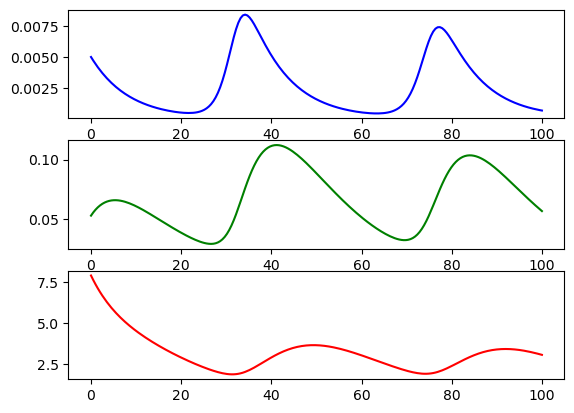

In [91]:
plt.figure()
plt.subplot(3, 1, 1)
plt.plot(times, values[:, 0], 'b')
plt.subplot(3, 1, 2)
plt.plot(times, values[:, 1], 'g')
plt.subplot(3, 1, 3)
plt.plot(times, values[:, 2], 'r')
plt.show()

## Mount the data directory

### Google Cloud

In [ ]:
## Google Drive
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#%cd /content/gdrive/MyDrive/
#%mkdir -p SyntheticData/GoodwinOscillator
#%cd SyntheticData/GoodwinOscillator

### Local Directory

In [64]:
import os
os.makedirs("SyntheticData/GoodwinOscillator", exist_ok=True)
os.chdir("SyntheticData/GoodwinOscillator")

## Generate the data

In [93]:
# times [0,40] into 1025 discrete value
times = np.linspace(0, 100, 1025)

# A function that takes a parameter set and times and returns the simulated values
def simulator(parameters, times):
    # randomly sample the y0 values between 0 and 100
    y = []
    y0 = np.random.uniform(0.001, 0.01)
    y.append(y0)
    y1 = np.random.uniform(0.01, 0.1)
    y.append(y1)
    y2 = np.random.uniform(1.0, 10.0)
    y.append(y2)
    # model
    model = pints.toy.GoodwinOscillatorModel()
    # set initial conditions
    model.set_initial_conditions(y)
    # parameters
    real_parameters = model.suggested_parameters()
    return model.simulate(real_parameters, times)

### the Training dataset

In [94]:
import h5py

with h5py.File('GoodwinOscillator_Training.hdf5', 'w') as f:
    for i in range(1024):
        values = simulator(real_parameters, times)
        f.create_dataset(str(i), data=values)

### The validation dataset

In [95]:
with h5py.File('GoodwinOscillator_Validation.hdf5', 'w') as f:
    for i in range(32):
        values = simulator(real_parameters, times)
        f.create_dataset(str(i), data=values)

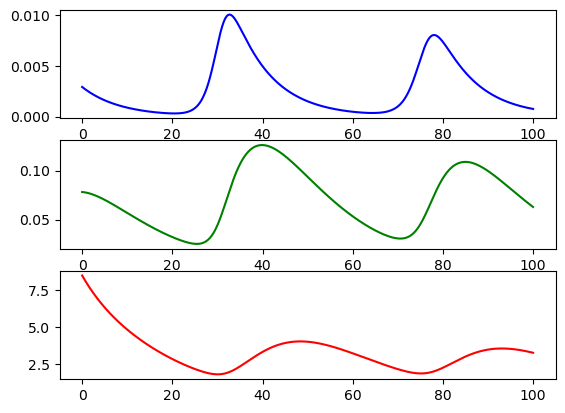

In [100]:
# read the data from the validation dataset
with h5py.File('GoodwinOscillator_Validation.hdf5', 'r') as f:
    data = f['4']
    # transform the data into a numpy array
    data = np.array(data)
    # plot the data
    plt.figure()
    plt.subplot(3, 1, 1)
    plt.plot(times, data[:, 0], 'b')
    plt.subplot(3, 1, 2)
    plt.plot(times, data[:, 1], 'g')
    plt.subplot(3, 1, 3)
    plt.plot(times, data[:, 2], 'r')
    plt.show()
